# **Report on IoTPond7**

**Introduction**

In this report, I will analyze the IoTPond7 dataset, which contains information about fish in a pond. The dataset consists of 279,612 rows and 14 columns. My objective is to understand the relationship between different features and use machine learning models to predict fish length and weight based on various attributes.

**Data Preprocessing**

To prepare the dataset for analysis, I performed several data preprocessing steps. First, I dropped the "Date," "created_at," "entry_id," and unnecessary "Unnamed" columns (11, 12, and 13) as they are not relevant to our analysis.

Next, I checked for missing values and found that the "ammonia(g/ml)" column has 94,388 missing values. To handle these missing values, I filled them with the mean value of the column.

I also checked for infinite values and observed that the "ammonia(g/ml)" column has 189,345 infinite values. To address this issue, I replaced these infinite values with a very large number (1e9) to ensure numerical stability during analysis.

**Splitting the Data and Target**

To proceed with model training, I split the dataset into the data (X) and target (Y and Z for fish length and weight, respectively) variables. This separation ensures that we have separate inputs and outputs for our machine learning models.

Additionally, I further split the data into training and test datasets to evaluate the performance of our models.

**Decision Tree Regressor for Fish Length Prediction**

For predicting fish length, I employed a Decision Tree Regressor model. I used grid search with cross-validation to find the best hyperparameters for the model. The hyperparameters I tuned were max_depth, min_samples_split, and min_samples_leaf. The evaluation metric used for scoring was negative root mean squared error (RMSE).

After fitting the grid search object to the training data, I obtained the best hyperparameters and evaluated the model on the test data. The test scores for fish length prediction are as follows:

- Test MSE score: 1.0257776197181288
- Test RMSE score: 1.01280680276059
- Test MAE score: 0.540959586069609
- Test R-squared score: 0.9973551069149783
- Test MSLE score: 0.001359456375043975

Based on the analysis, the most important attributes for determining fish length were PH, ammonia(g/ml), nitrate(g/ml), and temperature(C).

**XGBoost Regressor for Fish Weight Prediction**

To predict fish weight, I utilized an XGBoost Regressor model. I performed a randomized search with cross-validation to find the optimal hyperparameters for the model. The hyperparameters I tuned were max_depth, learning_rate, n_estimators, gamma, and min_child_weight. The evaluation metric used for scoring was negative root mean squared error (RMSE).

After fitting the randomized search object to the training data, I obtained the best hyperparameters and evaluated the model on the test data. The test scores for fish weight prediction are as follows:

- Test MSE score: 49.26981352230902
- Test RMSE score: 7.019245936873064
- Test MAE score: 2.23104303871279
- Test R-squared score: 0.9995309306563137
- Test MSLE score: 0.001359456375043975

According to the analysis, the most important attributes for determining fish weight were turbidity(NTU), nitrate(g/ml), PH, and temperature(C).

**Conclusion**

In conclusion, I analyzed the

 IoTPond7 dataset and used machine learning models to predict fish length and weight. The Decision Tree Regressor achieved a test RMSE score of 1.0128 for fish length prediction, while the XGBoost Regressor achieved a test RMSE score of 7.0192 for fish weight prediction. The most influential attributes for both predictions were PH, ammonia(g/ml), nitrate(g/ml), and temperature(C) for fish length, and turbidity(NTU), nitrate(g/ml), PH, and temperature(C) for fish weight.

These findings provide valuable insights into the factors affecting the size and weight of fish in the pond, which can contribute to effective management and decision-making in aquaculture.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/IoTPond7.csv")
data.head()

,created_at,Date,entry_id,temperature(C),turbidity (NTU),Dissolved Oxygen (g/ml),PH,ammonia(g/ml),nitrate(g/ml),Fish_length(cm),Fish_weight(g),Unnamed: 11,Unnamed: 12,Unnamed: 13
0,2021-06-18 13:02:10 CET,18-06-21,1,25.3750,41,40.048,8.17490,780.03149,1218,6.772857,3.037143,NaN,NaN,NaN
1,2021-06-18 13:02:30 CET,18-06-21,2,25.3750,41,40.048,8.13858,0.14989,1968,6.772857,3.037143,NaN,NaN,NaN
2,2021-06-18 13:02:50 CET,18-06-21,3,25.3125,41,40.048,8.34740,0.24039,1879,6.772857,3.037143,NaN,NaN,NaN
3,2021-06-18 13:03:10 CET,18-06-21,4,25.3125,41,40.048,8.17490,0.31723,1792,6.772857,3.037143,NaN,NaN,NaN
4,2021-06-18 13:03:40 CET,18-06-21,5,25.3750,31,40.048,8.14766,1.02537,1934,6.772857,3.037143,NaN,NaN,NaN


In [ ]:
data.shape

(279612, 14)

__We have 279612 rows and 14 columns in dataset.__

In [ ]:
#Check for number of missing values
data.isnull().sum()

created_at                      0
Date                            0
entry_id                        0
temperature(C)                  0
turbidity (NTU)                 0
Dissolved Oxygen (g/ml)         0
PH                              0
ammonia(g/ml)               94388
nitrate(g/ml)                   0
Fish_length(cm)                 0
Fish_weight(g)                  0
Unnamed: 11                279612
Unnamed: 12                279606
Unnamed: 13                279605
dtype: int64

In [ ]:
# drop Date, created_at, entry_id, Unnamed: 11, Unnamed: 12 and Unnamed: 13 columns
data = data.drop(['Date', 'created_at','entry_id','Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'], axis= 1)
data.head()

,temperature(C),turbidity (NTU),Dissolved Oxygen (g/ml),PH,ammonia(g/ml),nitrate(g/ml),Fish_length(cm),Fish_weight(g)
0,25.3750,41,40.048,8.17490,780.03149,1218,6.772857,3.037143
1,25.3750,41,40.048,8.13858,0.14989,1968,6.772857,3.037143
2,25.3125,41,40.048,8.34740,0.24039,1879,6.772857,3.037143
3,25.3125,41,40.048,8.17490,0.31723,1792,6.772857,3.037143
4,25.3750,31,40.048,8.14766,1.02537,1934,6.772857,3.037143


In [ ]:
#fill missing values with mean
data['ammonia(g/ml)']= data['ammonia(g/ml)'].fillna(data['ammonia(g/ml)'].mean())

 Understanding the correlation between various features in the dataset


In [ ]:
correlation = data.corr()

<Axes: >

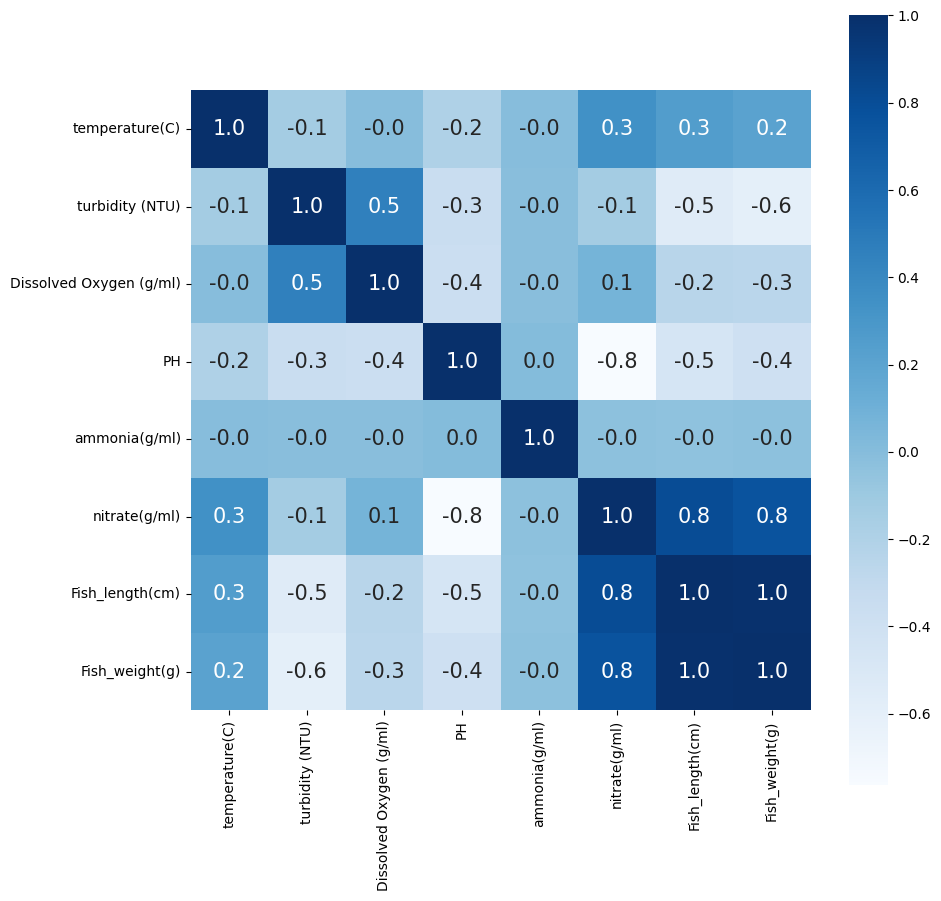

In [ ]:
# Contructing a heatmap to understand correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 15}, cmap='Blues')

In [ ]:
# Check for infinite values
print(np.isinf(data).sum())

temperature(C)                  0
turbidity (NTU)                 0
Dissolved Oxygen (g/ml)         0
PH                              0
ammonia(g/ml)              189345
nitrate(g/ml)                   0
Fish_length(cm)                 0
Fish_weight(g)                  0
dtype: int64


In [ ]:
# Replace infinite values with a very large number
data = data.replace([np.inf, -np.inf], 1e9)


In [ ]:
# Check for infinite values
print(np.isinf(data).sum())

temperature(C)             0
turbidity (NTU)            0
Dissolved Oxygen (g/ml)    0
PH                         0
ammonia(g/ml)              0
nitrate(g/ml)              0
Fish_length(cm)            0
Fish_weight(g)             0
dtype: int64


*Splitting* the data and target

In [ ]:
# Drop the target variables from the input features dataframe
X = data.drop(['Fish_length(cm)', 'Fish_weight(g)'], axis=1)

# Extract the target variables
Y = data['Fish_length(cm)']
Z = data['Fish_weight(g)']

Splitting data into training and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state= 2)

In [ ]:
X_train, X_test, Z_train, Z_test = train_test_split(X,Z, test_size= 0.2, random_state= 2)

## Model training


Decision Tree Regressor for fish lenght


In [ ]:
# define the model
model = DecisionTreeRegressor()

# define the grid of hyperparameters to search
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# define the evaluation metric to use for scoring
scoring = 'neg_root_mean_squared_error'

# define the grid search object with cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=cv)

# fit the grid search object to the data
grid_search.fit(X_train, Y_train)

# print the best hyperparameters and RMSE score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best RMSE score: {abs(grid_search.best_score_)}")


Best hyperparameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best RMSE score: 1.0192564970892843


In [ ]:
import pickle

# Train the model with the best hyperparameters
model = DecisionTreeRegressor(**grid_search.best_params_)
model.fit(X_train, Y_train)

# Export the trained model using pickle
with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(model, f)


Prediction on Test data

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

# Evaluate the model on the test set
y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
msle = mean_squared_log_error(Y_test, y_pred)

print(f"Test MSE score: {mse}")
print(f"Test RMSE score: {rmse}")
print(f"Test MAE score: {mae}")
print(f"Test R-squared score: {r2}")
print(f"Test MSLE score: {msle}")


Test MSE score: 1.0685124823258803
Test RMSE score: 1.0336887744025667
Test MAE score: 0.5419170744005948
Test R-squared score: 0.9972449181757936
Test MSLE score: 0.001430669392659766


In [ ]:
# get the feature importances and sort them by value
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values()

importances

turbidity (NTU)            0.001997
Dissolved Oxygen (g/ml)    0.003766
temperature(C)             0.009446
nitrate(g/ml)              0.015926
ammonia(g/ml)              0.024758
PH                         0.944108
dtype: float64

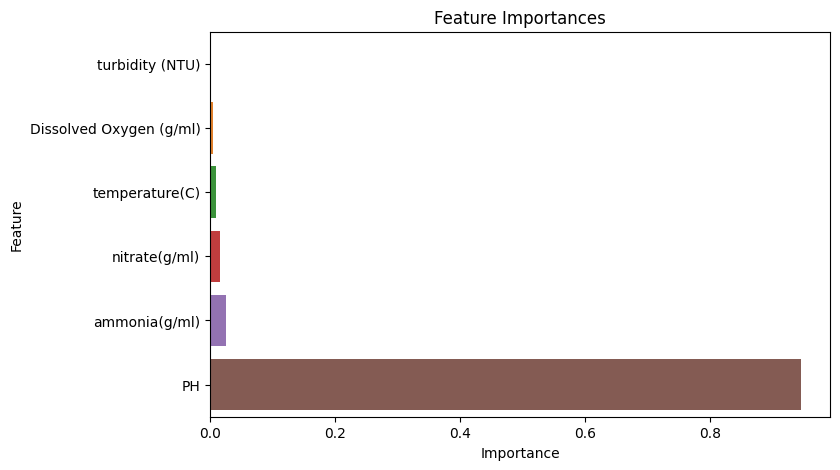

In [ ]:
# plot the feature importances
plt.figure(figsize=(8,5))
sns.barplot(x=importances.values, y=importances.index)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

__PH, ammonia(g/ml), nitrate(g/ml), temperature(C) are the most important attributes to determine the Fish Length(cm).__

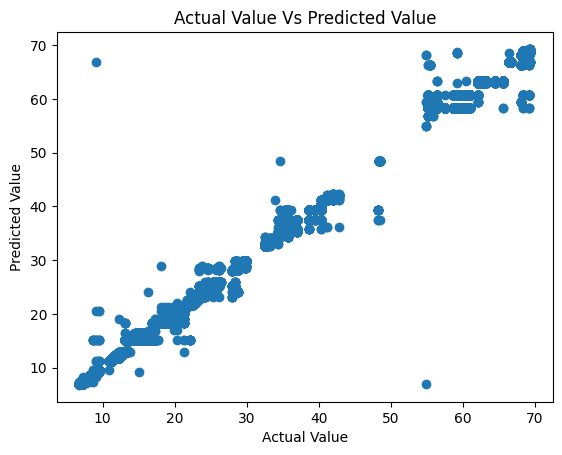

In [ ]:
plt.scatter(Y_test, y_pred)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual Value Vs Predicted Value')
plt.show()

XGBoost *Regressor* for fish weight

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# define the model
model = XGBRegressor()

# define the grid of hyperparameters to search
param_distributions = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'n_estimators': [50, 100, 200, 500],
    'gamma': [0, 0.1, 0.5, 1],
    'min_child_weight': [1, 5, 10]
}

# define the evaluation metric to use for scoring
scoring = 'neg_root_mean_squared_error'

# define the randomized search object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, n_iter=50, scoring=scoring, cv=5)

# fit the randomized search object to the data
random_search.fit(X_train, Z_train)

# print the best hyperparameters and RMSE score
print(f"Best hyperparameters: {random_search.best_params_}")
print(f"Best RMSE score: {abs(random_search.best_score_)}")

In [ ]:
import pickle

# Train the model with the best hyperparameters
model = XGBRegressor(**random_search.best_params_)
model.fit(X_train, Z_train)

# Export the trained model using pickle
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(model, f)


Prediction on Test data

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

# Evaluate the model on the test set
z_pred = model.predict(X_test)

mse = mean_squared_error(Z_test, z_pred)
rmse = mean_squared_error(Z_test, z_pred, squared=False)
mae = mean_absolute_error(Z_test, z_pred)
r2 = r2_score(Z_test, z_pred)
# msle = mean_squared_log_error(Z_test, z_pred)

print(f"Test MSE score: {mse}")
print(f"Test RMSE score: {rmse}")
print(f"Test MAE score: {mae}")
print(f"Test R-squared score: {r2}")
print(f"Test MSLE score: {msle}")


Test MSE score: 35.61661622575377
Test RMSE score: 5.967965836510274
Test MAE score: 1.8954939424383892
Test R-squared score: 0.9996609148360228
Test MSLE score: 0.001430669392659766


In [ ]:
# get the feature importances and sort them by value
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values()

importances

Dissolved Oxygen (g/ml)    0.004435
ammonia(g/ml)              0.024517
temperature(C)             0.027893
PH                         0.051299
nitrate(g/ml)              0.106411
turbidity (NTU)            0.785446
dtype: float32

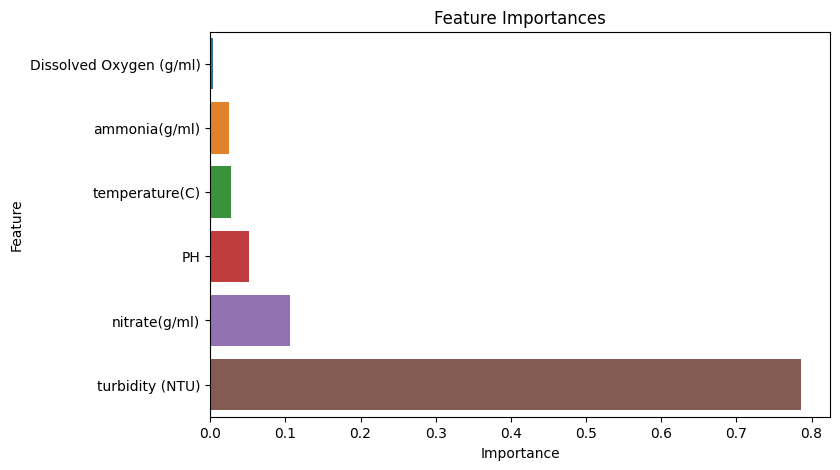

In [ ]:
# plot the feature importances
plt.figure(figsize=(8,5))
sns.barplot(x=importances.values, y=importances.index)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

 __Turbidity(NTU), Nitrate(g/ml), PH, temperature(C) are the most important attributes to determine the Fish Wieght(g)__


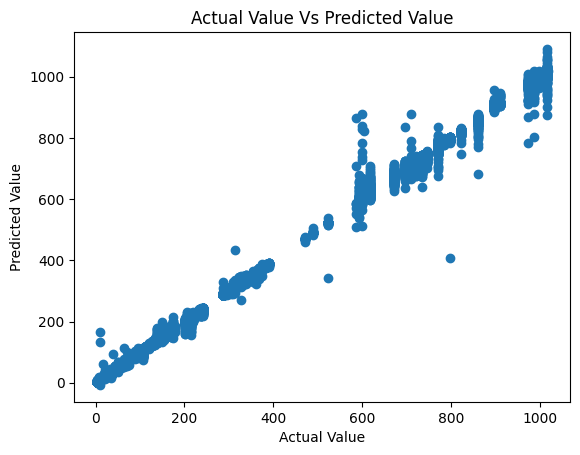

In [ ]:
plt.scatter(Z_test, z_pred)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual Value Vs Predicted Value')
plt.show()

TEST WITH NEW VALUES